# Phrases to images of text

In this example, we will use images saved as files named a to z (the 26 letters of the alphabet), to generate a graph (image) of a specified user-generated phrase

These images are saved locally in a folder called letters, containing the images in .jpg format

In [1]:
# Load required libraries and set the folder location
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import glob
import re

folder = "C:\\Users\\kelvi\\Desktop\\letters"

Next, we will define and load the image files

In [2]:
# https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
# https://matplotlib.org/stable/tutorials/introductory/images.html
# https://stackoverflow.com/questions/22483588/how-to-plot-multiple-dataframes-in-subplots

# inspiration for this notebook was taken from the above urls

# load the images
image_list = []
file_list = []
for filename in glob.glob(folder+'/*.jpg'):
    im=Image.open(filename)
    im.thumbnail((128, 128))  # resizes image in-place
    image_list.append(im)
    file_list.append(filename)


# strip to letter name and add to image_list, use what we find as cannot assume all letters have been created
file_list_letter = []
for exp in file_list:
    search_for = folder
    m = exp[:exp.find('.')]
    m = m[-1]
    file_list_letter.append(m)
    

Then we'll convert this to a dataframe, and specify the phrase we want to generate a graphical image for

In [3]:
# make as df
df = pd.DataFrame({'file':file_list,'letter':file_list_letter})

# the phrase
phrase = "the computer said hello to me"

First, we will make a graph of each letter and combine these into a graph containing all the letters of this word, repeating this process for every word in the phrase

In [4]:
# for word in phrase - separate by space str.split(x," ")
words = str.split(phrase," ")
plots = []
for word in words:
    phrase=word
    col_len = len(phrase)
    fig, ax = plt.subplots(1,len(word), layout="constrained")
    
    for letter_used in range(0,col_len):
        num = letter_used
        letter_used = phrase[letter_used]
        image_use = df[df['letter'] == letter_used] # filter to used letter
        image_use = image_use[['file']] # keep just the file to load or use?
        image_use = image_use['file'].values[0]
        im=Image.open(image_use)
        #implt = plt.imshow(im)
        ax[num].imshow(im)
        ax[num].axis('off')
    
    #set size of graph
    cmsize=1/2.54
    fig.set_size_inches(30*cmsize, 15*cmsize)
    plt.savefig(word)
    
    #plt.show()
    plt.close()

Next, we will take these locally saved images of the words and combine them into one image of the entire phrase

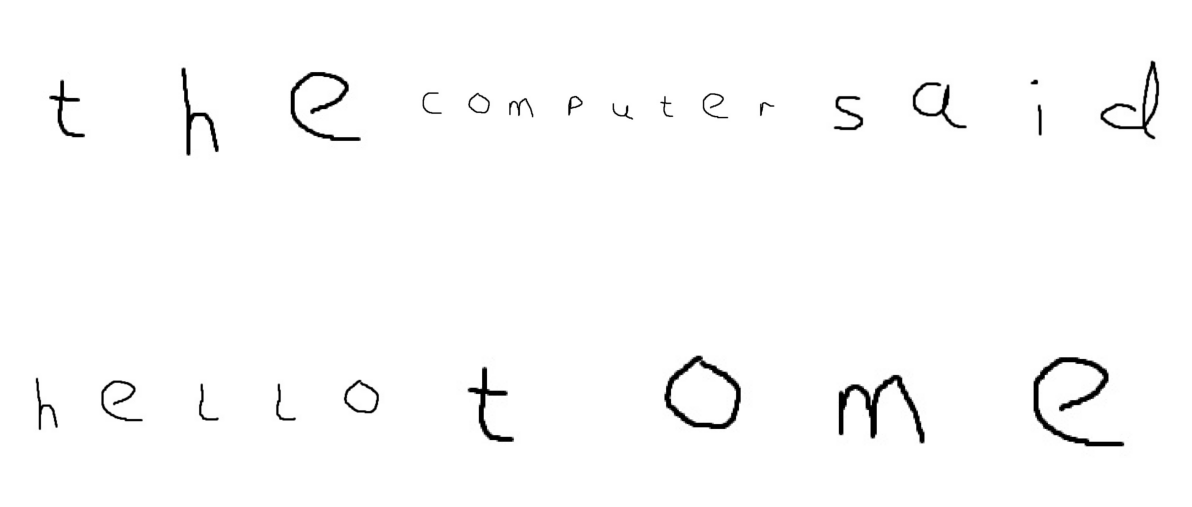

In [5]:
# get row number based on 3 words to a row
col_num = 3

lenr = 0
for word in range(0,len(words)):
    # get number of rows
    if word % col_num == 1:
        lenr += 1
        
rownum = lenr

if rownum == 0:
    rownum = 1
else:
    rownum = rownum

fig, ax = plt.subplots(rownum,col_num,layout="constrained")

    
# plot counter
count=0
for r in range(rownum):
    if rownum == 1:
        r = 1
    else:
        r = r
        
    for c in range(col_num):
        if count > len(words)-1:
            ax[r,c].plot(1,1)
            ax[r,c].axis('off')
        else:
            loc_img = str(words[count])+".png"
            im=Image.open(loc_img)
            ax[r,c].imshow(im)
            ax[r,c].axis('off')
            count+=1
            
#set size of graph
cmsize=1/2.54
fig.set_size_inches(30*cmsize, 15*cmsize)

#plt.savefig("abc.png")
plt.show()
#plt.close()

In [6]:
# Finally, remove the word images and just keep the remaining phrase image

# remove individual words pictures
for word in range(0,len(words)):
    loc_img = str(words[word])+".png"
    try:
        os.remove(loc_img)
    except:
        pass